# В данной работе мы использовали 3 датасета: USPTO, ORD и USPTO -50 k. Все эти датасеты находятся в открытом доступе.
**Вот так они выглядели изначально:**

**USPTO**

In [8]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.6 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=297a60020aab34f875d2acf5b5ef45f6d86c52b648a7a9eba0cca209d0322be8
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
USPTO_df = pd.read_csv('US_patents_1976-Sep2016_1product_reactions_yield_ok_cropped_data_test.csv', sep='\t')
USPTO_df

,Unnamed: 0,myID,Source,Target,CanonicalizedReaction,OriginalReaction,Yield
0,2,ID00000002,C C ( C ) ( C ) N N C ( C ) ( C # N ) C 1 C C ...,C C ( C ) ( C ) N N C 1 ( C # N ) C C C C C C 1,CC(C)(C)NNC(C)(C#N)C1CC1.O=C1CCCCCC1>CC(=O)C1C...,[C:1]([NH:5][NH:6][C:7]([C:12]#[N:13])([CH:9]1...,95.0
1,7,ID00000007,C C ( C ) N . O = C 1 C C C ( c 2 c c c ( O C ...,C C ( C ) N C C ( O ) C O c 1 c c c ( C 2 = N ...,CC(C)N.O=C1CCC(c2ccc(OCC3CO3)cc2)=NN1>CO>CC(C)...,[O:1]1[CH2:18][CH:2]1[CH2:3][O:4][C:5]1[CH:10]...,100.0
2,8,ID00000008,C O . O = C ( O ) C C C ( = O ) c 1 c c c c c ...,C O C ( = O ) C C C ( = O ) c 1 c c c c c 1 O,CO.O=C(O)CCC(=O)c1ccccc1O>Cl>COC(=O)CCC(=O)c1c...,Cl.[OH:2][C:3]1[CH:15]=[CH:14][CH:13]=[CH:12][...,98.0
3,13,ID00000013,C C ( = O ) c 1 c c c 2 c ( c 1 ) C ( C ) ( C ...,C C 1 ( C ) c 2 c c ( C ( = O ) O ) c c c 2 O ...,CC(=O)c1ccc2c(c1)C(C)(C)c1cccnc1O2.[OH-]>BrBr....,BrBr.[OH-:3].[Na+].[C:5]([C:8]1[CH:9]=[CH:10][...,78.6
4,14,ID00000014,C S c 1 c c c ( N = C = O ) c c 1 . O C c 1 c ...,C S c 1 c c c ( N C ( = O ) O C c 2 c c c n c ...,CSc1ccc(N=C=O)cc1.OCc1cccnc1>C1CN2CCN1CC2.c1cc...,[N:1]1[CH:6]=[CH:5][CH:4]=[C:3]([CH2:7][OH:8])...,95.0
...,...,...,...,...,...,...,...
26399,50251,ID00050251,N # C c 1 c ( - c 2 c c c ( O ) c c 2 ) n n 2 ...,N # C c 1 c ( - c 2 c c c ( O ) c c 2 ) n n 2 ...,N#Cc1c(-c2ccc(O)cc2)nn2c1NCCC2c1ccccc1N.O=C(Cl...,[NH2:1][C:2]1[CH:7]=[CH:6][CH:5]=[CH:4][C:3]=1...,62.0
26400,50253,ID00050253,N C ( = O ) c 1 c ( - c 2 c c c ( O c 3 c c c ...,N C ( = O ) c 1 c ( - c 2 c c c ( O c 3 c c c ...,NC(=O)c1c(-c2ccc(Oc3ccccc3)cc2)nn2c1ncc1ccc([N...,[N+:1]([C:4]1[CH:13]=[C:12]2[C:7]([CH:8]=[N:9]...,83.0
26401,50254,ID00050254,C C ( C ) ( C ) O C ( = O ) N C C N 1 C C N ( ...,C C ( C ) ( C ) O C ( = O ) N C C N 1 C C N ( ...,CC(C)(C)OC(=O)NCCN1CCN(C/C=C/C(=O)O)CC1.NC(=O)...,[O:1]([C:8]1[CH:13]=[CH:12][C:11]([C:14]2[C:28...,58.0
26402,50256,ID00050256,C c 1 n c 2 c ( O C C 3 C C C C C 3 ) c c c n ...,C N C [C@H] ( N C ( = O ) c 1 c ( C ) n c 2 c ...,Cc1nc2c(OCC3CCCCC3)cccn2c1C(=O)N[C@@H](CN(C)S(...,[CH:1]1([CH2:7][O:8][C:9]2[C:10]3[N:11]([C:15]...,57.6


**ORD**

In [ ]:
ORD_df = pd.read_csv('ord_to_add.tsv')
ORD_df

,standard_reaction_smiles\tyields
0,Cl.[CH3]O[CH2][C@H]([NH2])C1=[CH][CH]=[CH][CH]...
1,Cl.[CH3]O[CH2][C@H]([NH2])C1=[CH][CH]=[CH][CH]...
2,CC(=O)[O-].[CH3]C(=O)C1=[CH]C2=[CH][CH]=[CH][C...
3,CO.[CH]1=[CH][CH]=C(OC2=[CH][CH]=C(C3=[CH][CH2...
4,Cl.Cl[CH2][CH2][NH][CH2][CH2]Cl.[NH2]C1=[CH][C...
...,...
55488,CCCCCCCCCCC[CH2]OS(=O)(=O)[O-].O=COC=O.[NH2]C1...
55489,CC(=O)OC(C)=O.CCCCCCCCCCCCOS(=O)(=O)[O-].[NH2]...
55490,CCCCCCCCCCC[CH2]OS(=O)(=O)[O-].O=COC=O.[NH2]C1...
55491,CC(C)(C)OC(=O)N1[CH2][CH2][CH2][C@H]1C(=O)[NH]...


**USPTO**-**50k**

In [ ]:
USPTO_50k = pd.read_csv('class_train.csv')
USPTO_50k

,id,class,reactants>reagents>production
0,US05849732,6,O=C(OCc1ccccc1)[NH:1][CH2:2][CH2:3][CH2:4][CH2...
1,US20120114765A1,2,O[C:1](=[O:2])[c:3]1[cH:4][c:5]([N+:6](=[O:7])...
2,US08003648B2,1,O=[CH:1][c:2]1[cH:3][cH:4][c:5](-[c:6]2[n:7][c...
3,US09045475B2,1,O=[C:1]([CH2:2][F:3])[CH2:4][F:5].[CH3:6][C:7]...
4,US08188098B2,2,Cl[C:1](=[O:2])[O:3][CH:4]1[CH2:5][CH2:6][CH2:...
...,...,...,...
40003,US08518972B2,9,Br[CH2:1][c:2]1[cH:3][cH:4][c:5]([CH2:6][O:7][...
40004,US04628123,9,Br[c:1]1[c:2]([O:3][CH3:4])[cH:5][cH:6][c:7]2[...
40005,US08338361B2,9,O[CH:3]([CH2:2][CH3:1])[CH2:4][CH2:5][CH2:6][C...
40006,US20150080438A1,9,BrC(Br)(Br)[Br:1].O[CH2:2][CH2:3][CH2:4][CH2:5...


Для начала, мы оставили только общие у этих датасетов столбцы. Также, мы стандартизировали SMILES и удалили дубликаты. Вот что получилось:

In [ ]:
#Чистим датасет UPSTO_df

# UPSTO_train = UPSTO_train.drop(['myID', 'Unnamed: 0', 'Source','Target',  'OriginalReaction'], axis=1)
# UPSTO_train = UPSTO_train[['CanonicalizedReaction','Yield']]
# UPSTO_train.columns = ['Smiles_reaction','Yield']


#Чистим датасет ORD_df

# ORD_df.columns = ['Smiles_reaction', 'Yield']


# Чистим датасет SPTO_50k

# USPTO_50k = USPTO_50k.drop(['id'], axis=1)
# USPTO_50k = USPTO_50k[['class','reactants>reagents>production']]
# USPTO_50k.columns = ['Class', 'Smiles_reaction']


# combined_df = pd.concat([USPTO_df, ORD_df, USPTO_50k])
# combined_df.to_csv('/content/drive/MyDrive/combined_dataset_final.csv')


combined_df =  pd.read_csv('combined_dataset_final.csv')
combined_df

,Smiles_reaction,Yield,Class
0,Cl.[CH3]O[CH2][C@H]([NH2])C1=[CH][CH]=[CH][CH]...,22.1,NaN
1,Cl.[CH3]O[CH2][C@H]([NH2])C1=[CH][CH]=[CH][CH]...,57.3,NaN
2,CC(=O)[O-].[CH3]C(=O)C1=[CH]C2=[CH][CH]=[CH][C...,89.0,NaN
3,CO.[CH]1=[CH][CH]=C(OC2=[CH][CH]=C(C3=[CH][CH2...,66.0,NaN
4,Cl.Cl[CH2][CH2][NH][CH2][CH2]Cl.[NH2]C1=[CH][C...,75.0,NaN
...,...,...,...
631666,Br[CH2:1][c:2]1[cH:3][cH:4][c:5]([CH2:6][O:7][...,NaN,9.0
631667,Br[c:1]1[c:2]([O:3][CH3:4])[cH:5][cH:6][c:7]2[...,NaN,9.0
631668,O[CH:3]([CH2:2][CH3:1])[CH2:4][CH2:5][CH2:6][C...,NaN,9.0
631669,BrC(Br)(Br)[Br:1].O[CH2:2][CH2:3][CH2:4][CH2:5...,NaN,9.0


Далее, нам надо было заполнить недостающие значения **Class** и **Yields**. Для этого, в начале, мы провели классификацию по значениям **Class**.

В первую очередь, мы перевели строки **SMILES** в **fingerprint**:

In [ ]:
# import pandas as pd
# from drfp import DrfpEncoder


# def get_drfp(reaction_smiles, n_folded_length, radius=2):
#     """
#     Converts reaction SMILES into a Differential reaction fingerprint (DRFP).

#     :param reaction_smiles: Строка SMILES реакции.
#     :param n_folded_length: Размер фингерпринта (256, 512, 1024 и т.д.).
#     :param radius: Радиус для создания фингерпринта (по умолчанию 2).
#     :return: Фингерпринт реакции.
#     """
#     fp = DrfpEncoder.encode(reaction_smiles, n_folded_length=n_folded_length, radius=radius)
#     return fp[0]

# # Применяем функцию к каждому SMILES в датафрейме
# n_folded_length = 512  # Можно выбрать другое значение
# combined_data = pd.read_csv('combined_data.csv')
# combined_data['fingerprint'] = combined_data['Smiles_reaction'].apply(lambda x: get_drfp(x, n_folded_length))


# # Сохраняем результат в новом файле
# combined_data.to_csv('dataset_with_fingerprint.csv', index=False)

# combined_data = pd.read_csv('/content/drive/MyDrive/dataset_with_fingerprint.csv')
# Проверяем результат
print(combined_data.head())


                                     Smiles_reaction  Yield  Class  \
0  Cl.[CH3]O[CH2][C@H]([NH2])C1=[CH][CH]=[CH][CH]...   22.1    NaN   
1  Cl.[CH3]O[CH2][C@H]([NH2])C1=[CH][CH]=[CH][CH]...   57.3    NaN   
2  CC(=O)[O-].[CH3]C(=O)C1=[CH]C2=[CH][CH]=[CH][C...   89.0    NaN   
3  CO.[CH]1=[CH][CH]=C(OC2=[CH][CH]=C(C3=[CH][CH2...   66.0    NaN   
4  Cl.Cl[CH2][CH2][NH][CH2][CH2]Cl.[NH2]C1=[CH][C...   75.0    NaN   

                                         fingerprint  
0  [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...  
1  [0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0...  
2  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0...  
3  [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0...  
4  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...  


Мы получили датасет с векторами, и теперь мы могли работать с ним далее.
Мы стандиртизировали PCA и выделили главные компоненты:

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Загрузка данных
combined_data = pd.read_csv('dataset_with_fingerprint.csv')

def string_to_list(string):
    string = string.strip('[]')  # Удаление скобок
    return [int(x) for x in string.split()]

# Применение функции к столбцу 'fingerprint'
combined_data['fingerprint'] = combined_data['fingerprint'].apply(string_to_list)

# Преобразование списка отпечатков пальцев в DataFrame
fingerprint_df = pd.DataFrame(combined_data['fingerprint'].to_list())

# Масштабирование данных перед применением PCA
scaler = StandardScaler()
fingerprint_scaled = scaler.fit_transform(fingerprint_df)

# Применение PCA
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(fingerprint_scaled)

# Получение количества компонент
n_components = principal_components.shape[1]

# Создание списка названий столбцов для PCA
columns = ['PC' + str(i) for i in range(1, n_components + 1)]

# Создание DataFrame для результатов PCA
pca_df = pd.DataFrame(data=principal_components, columns=columns)

# Добавление других колонок, если это необходимо
pca_df['Yield'] = combined_data['Yield']

# Вывод первых нескольких строк для проверки
print(pca_df.head())

# Объединение результатов PCA с исходным датафреймом
df_combined = pd.concat([combined_data, pca_df], axis=1)

# Сохранение в файл CSV
df_combined.to_csv('pca_results.csv', index=False)

print("Результаты PCA сохранены в файле 'pca_results.csv'")

Проверили **доли дисперсии**:

In [ ]:
plt.plot(np.arange(1,435), explained_variance, ls= '-')

###Подход 1

Далее, сделали **UMAP** для того, чтобы найти закономерности распределения по классам:

In [ ]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
import seaborn as sns

principal_df = pd.read_csv('pca_and_class.csv')

# Отделяем данные для UMAP
data = principal_df.drop('Class', axis=1)
classes = principal_df['Class']

# Применение UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(data)

# Сохранение компонентов UMAP в файл NumPy
np.save('umap_components.npy', embedding)

# Сохранение компонентов UMAP в CSV
umap_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
umap_df.to_csv('umap_output.csv', index=False)

# Визуализация
plt.figure(figsize=(12, 10))
sns.scatterplot(embedding[:, 0], embedding[:, 1], hue=classes, palette=sns.color_palette("hsv", 10), legend='full')
plt.title('UMAP projection')
plt.show()


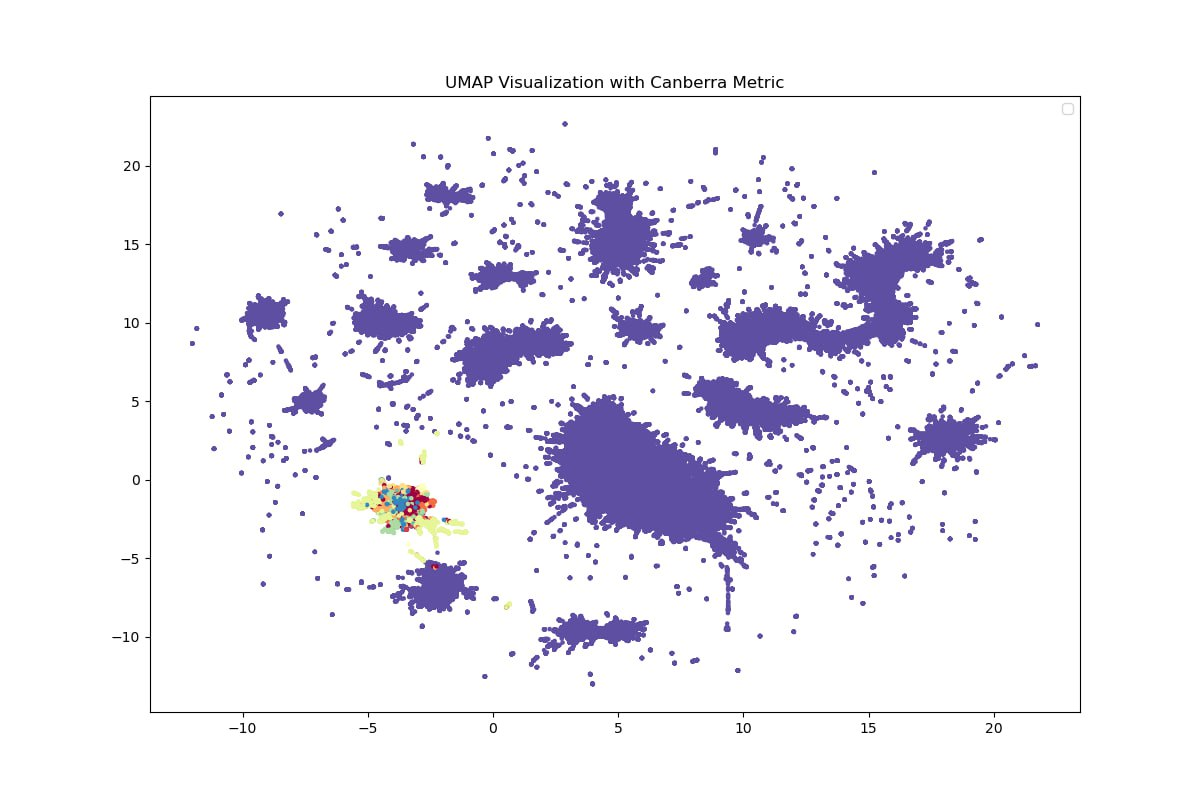

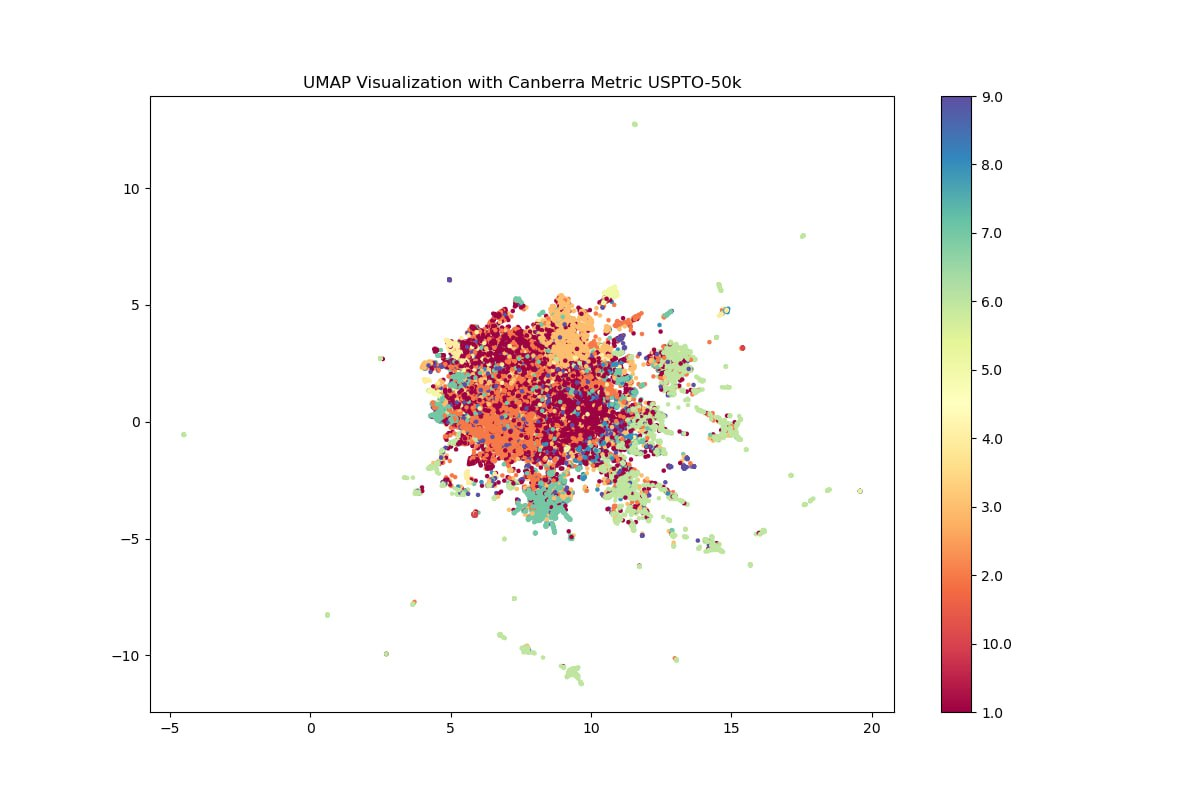

Исходя из данного графика, мы не смогли найти закономерность в распределении по классам. Мы переключились на вторую часть исследования датасета.


###Подход 2


Мы переключились на **кластеризацию** на основе выходов реакций.
Мы **удалили** из датесета часть **USPTO-50**, в которой отсутствовали значения **Yields**. Мы снова посчитали PCA, но на этот раз без классов:

In [ ]:
# Считаем PCA по подобию предыдущего PCA
# df = pd.read_csv('/content/drive/MyDrive/pca_results_without_classes.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.to_csv('pca_results_without_classes.csv',index=False)
df

,Smiles_reaction,Yield,Class,fingerprint,PC1,PC2,PC3,PC4,PC5,PC6,...,PC419,PC420,PC421,PC422,PC423,PC424,PC425,PC426,PC427,PC428
0,Cl.[CH3]O[CH2][C@H]([NH2])C1=[CH][CH]=[CH][CH]...,22.1,NaN,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.080310,0.812832,3.592814,-2.591554,-3.781133,2.095939,...,0.498749,1.181182,0.144764,0.081295,0.222464,0.292658,-0.194084,-0.287337,-3.267674,1.332522
1,Cl.[CH3]O[CH2][C@H]([NH2])C1=[CH][CH]=[CH][CH]...,57.3,NaN,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...",1.255207,0.767397,4.004636,-2.733121,-3.832856,1.898167,...,0.239528,0.723039,0.122722,0.313342,0.212525,0.519815,0.093060,-0.385689,-3.076851,1.247909
2,CC(=O)[O-].[CH3]C(=O)C1=[CH]C2=[CH][CH]=[CH][C...,89.0,NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-2.604332,0.165167,0.275166,-0.826678,1.482144,2.225550,...,0.637372,-0.478582,0.507041,-0.501444,-0.352983,0.097264,0.085554,0.194490,0.028987,0.094384
3,CO.[CH]1=[CH][CH]=C(OC2=[CH][CH]=C(C3=[CH][CH2...,66.0,NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",0.864119,-0.393610,2.334114,-0.194532,-0.526134,0.243815,...,0.938605,-1.832483,0.583177,-0.963192,-0.615427,-0.167411,-0.285621,-0.134189,0.856038,0.251556
4,Cl.Cl[CH2][CH2][NH][CH2][CH2]Cl.[NH2]C1=[CH][C...,75.0,NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.193100,-1.115564,-0.362684,2.592061,0.623816,0.717728,...,-0.590764,-0.993097,-0.302109,0.178116,-0.519271,0.435420,0.586728,-0.001516,0.878588,-0.047355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581955,COc1cccc(C(=N)Nc2c(C(C)C)cc(Br)cc2C(C)C)c1.O=C...,79.0,NaN,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, ...",1.333192,2.601349,1.047362,-3.899963,-1.736772,3.595420,...,1.102706,0.387112,-0.055871,0.014492,-0.103350,-0.434038,-1.749440,-0.136117,0.485579,0.298329
581956,O=[N+]([O-])c1ccccc1-c1ccc(Br)cc1>CCOP(OCC)OCC...,65.5,NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.158333,1.518442,1.930149,-1.299866,9.490208,1.420779,...,0.357211,0.736585,0.004313,0.556229,-0.379943,-0.569925,-0.301966,-0.558438,-0.411059,0.409910
581957,Brc1ccc2c(c1)[nH]c1ccccc12.Ic1ccccn1>C1COCCO1....,43.2,NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",-1.056361,4.467558,1.547382,-1.243518,-1.589288,-1.505109,...,-0.265810,-0.094115,0.228846,-0.960930,-0.141183,0.071321,-1.049635,0.335871,-0.307106,-0.048345
581958,Brc1ccc2c3ccccc3n(-c3ccccn3)c2c1.[I-]>C1COCCO1...,83.1,NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...",-1.086081,3.777348,-0.379832,2.027044,-1.025107,-2.133084,...,0.705508,0.709250,0.593696,-0.886727,-0.990342,-0.072968,0.306473,-0.760777,0.524390,0.638361


В этот раз получаем **428 PCA**. Далее делим датасет на 3 по **процентилю**:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


percentile_33 = df['Yield'].quantile(0.33)
percentile_66 = df['Yield'].quantile(0.66)

# Разделение на группы по процентилям
group1 = df[df['Yield'] < percentile_33]
group2 = df[(df['Yield'] >= percentile_33) & (df['Yield'] <= percentile_66)]
group3 = df[df['Yield'] > percentile_66]

group1.to_csv('/content/drive/MyDrive/pca_1_clear.csv', index=False)
group2.to_csv('/content/drive/MyDrive/pca_2_clear.csv', index=False)
group3.to_csv('/content/drive/MyDrive/pca_3_clear.csv', index=False)

pca_1_clear = group1
pca_2_clear = group2
pca_3_clear = group3

In [ ]:
pca_1_clear

,Smiles_reaction,Yield,Class,fingerprint,PC1,PC2,PC3,PC4,PC5,PC6,...,PC419,PC420,PC421,PC422,PC423,PC424,PC425,PC426,PC427,PC428
0,Cl.[CH3]O[CH2][C@H]([NH2])C1=[CH][CH]=[CH][CH]...,22.1,NaN,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.080310,0.812832,3.592814,-2.591554,-3.781133,2.095939,...,0.498749,1.181182,0.144764,0.081295,0.222464,0.292658,-0.194084,-0.287337,-3.267674,1.332522
10,[CH3]C1=N[CH]=[CH]C(Cl)=C1Cl.[CH3][CH2]O[CH2][...,28.0,NaN,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1.406542,-1.209123,0.202606,0.800967,-0.602355,-0.501475,...,0.013671,0.233112,-0.769385,-1.049600,0.820735,0.545815,-0.240822,1.385643,0.799345,0.394706
11,C1=CC=C([P+]([CH2][CH2][CH2][CH]2[CH2][CH2][CH...,42.0,NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1.370976,-0.107154,0.098117,-1.336981,0.371405,0.429233,...,0.511623,-0.798292,-1.583878,0.123542,0.654913,-1.033863,0.130009,0.084326,0.325533,-0.288053
12,[Br-].[CH3][CH2]OC1=C([NH][CH]2[CH2][CH2]C(=O)...,51.0,NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",-2.097067,0.146665,0.068581,-1.408931,-1.158586,0.586651,...,0.274157,-0.537434,-1.039219,0.230157,-0.618989,-0.481498,-0.009554,0.405544,1.418191,0.085230
16,OC(=O)[O-].[CH3][CH2]C1=N[CH]=[CH]C(Cl)=C1Cl.[...,7.0,NaN,"[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",1.062801,0.394144,-0.365016,-1.615260,-0.828321,0.019799,...,0.434685,-0.508431,-1.099754,-0.619026,0.748021,-0.217936,-0.474071,0.835723,0.119095,-0.750401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581932,CS(N)(=O)=O.Cc1nc2c(OCC3CCCCC3)cccn2c1C(=O)N[C...,34.8,NaN,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",4.419102,0.324469,-0.927701,-3.961565,-0.842061,-1.289714,...,0.882963,0.303218,0.573517,1.264271,-0.292793,0.628212,0.102656,-0.427430,-0.265436,-0.191958
581941,CC(C)(C)OC(=O)Nc1ccc2c(Br)c(N)ccc2c1.Clc1ns[s+...,28.4,NaN,"[0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, ...",2.863992,3.946777,2.955833,-2.185496,-1.860344,2.156981,...,-0.565218,-0.068726,-0.368028,1.105314,-0.647844,-1.895027,0.193382,-0.251056,0.708674,1.431825
581943,N[C@H](CS)C(O)=O.Nc1ccc2c(ccc3nc(C#N)sc32)c1>C...,34.4,NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1.047140,2.236456,-1.563263,-1.403039,-0.783511,0.516393,...,0.736070,-0.472348,0.026872,0.471040,-1.200768,1.683215,-0.615971,0.626726,-0.171737,-0.353687
581946,C=CCOC(=O)[C@H](Cc1ccc(OP(=O)(Cc2ccccc2)Cc2ccc...,44.1,NaN,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",0.389974,0.263992,1.826046,-2.126457,0.316617,-2.547531,...,1.006558,0.037814,0.337034,0.492471,0.443903,-0.465555,-0.079617,-0.987221,0.874277,0.182061


Получились **3** датасета:

1.   **Yields** <=54.71
2.   **Yields** >=54 и <=80.7
3.   **Yields** >=80.7 и <=100


In [ ]:
pca_1_clear.Yield.max()

54.71

In [ ]:
pca_2_clear.Yield.max()

80.7

In [ ]:
pca_3_clear.Yield.max()

100.0

Снова посчитали **UMAP** каждого из 3х датасетов:

In [ ]:
import umap
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(123)
# Визуализация UMAP без раскраски
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, metric='canberra', random_state=42)
umap_embeddings = umap_model.fit_transform(pca_1_clear)


# Создание датафрейма с индексами из исходного датафрейма
umap_df = pd.DataFrame(umap_embeddings, index=pca_1_clear.index)
umap_df.columns = ['UMAP_1', 'UMAP_2']

# Сохранение UMAP embeddings вместе с индексами
umap_df.to_csv('/content/drive/MyDrive/umap_embeddings_1_with_indices.csv')

# Визуализация
plt.figure(figsize=(12, 8))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], s=5)
plt.title('UMAP Visualization without Coloring (data_pca_1)')
plt.savefig('/content/drive/MyDrive/umap_visualization_data_pca_1.png')
plt.close()

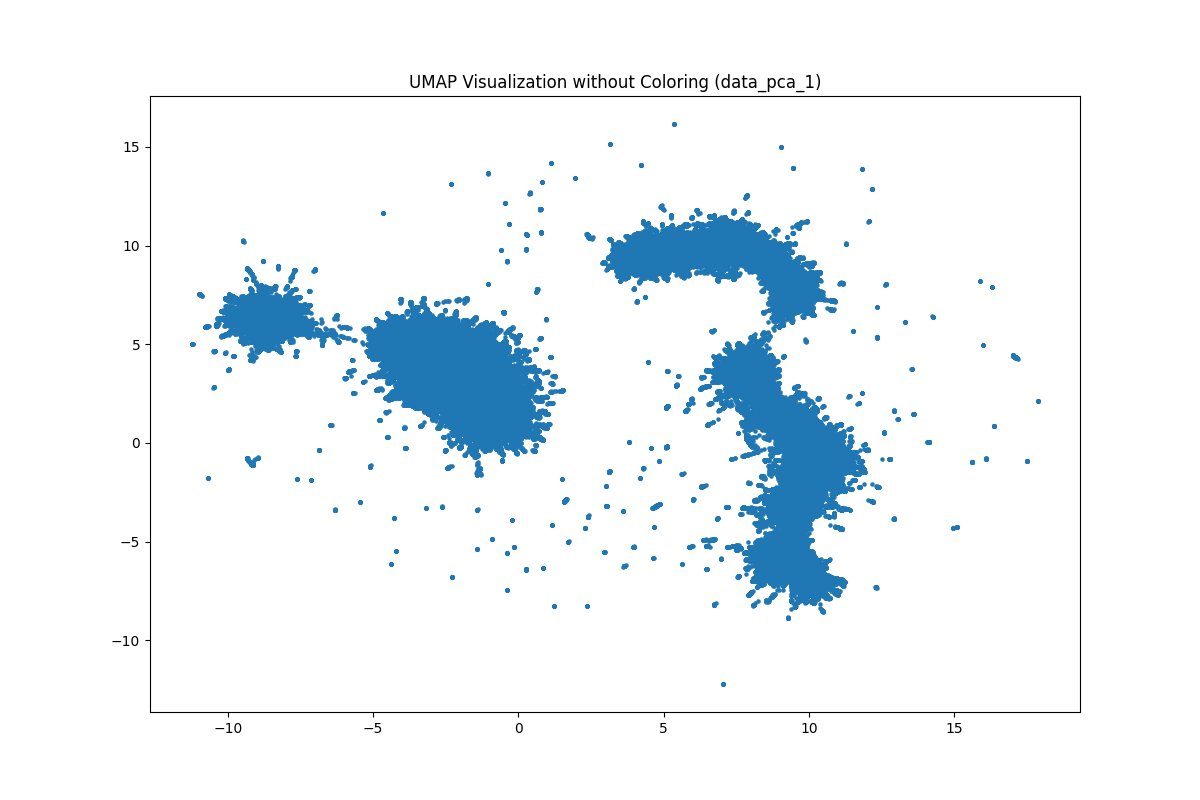

In [ ]:
import umap
import numpy as np
import matplotlib.pyplot as plt

# Предполагается, что data_pca_ уже загружены и представляют собой предварительно обработанные данные
np.random.seed(123)
# Визуализация UMAP без раскраски
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, metric='canberra', random_state=42)
umap_embeddings = umap_model.fit_transform(pca_2_clear)


# Создание датафрейма с индексами из исходного датафрейма
umap_df = pd.DataFrame(umap_embeddings, index=pca_2_clear.index)
umap_df.columns = ['UMAP_1', 'UMAP_2']

# Сохранение UMAP embeddings вместе с индексами
umap_df.to_csv('/content/drive/MyDrive/umap_embeddings_2_with_indices.csv')

# Визуализация
plt.figure(figsize=(12, 8))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], s=5)
plt.title('UMAP Visualization without Coloring (data_pca_2)')
plt.savefig('/content/drive/MyDrive/umap_visualization_data_pca_2.png')
plt.close()




/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


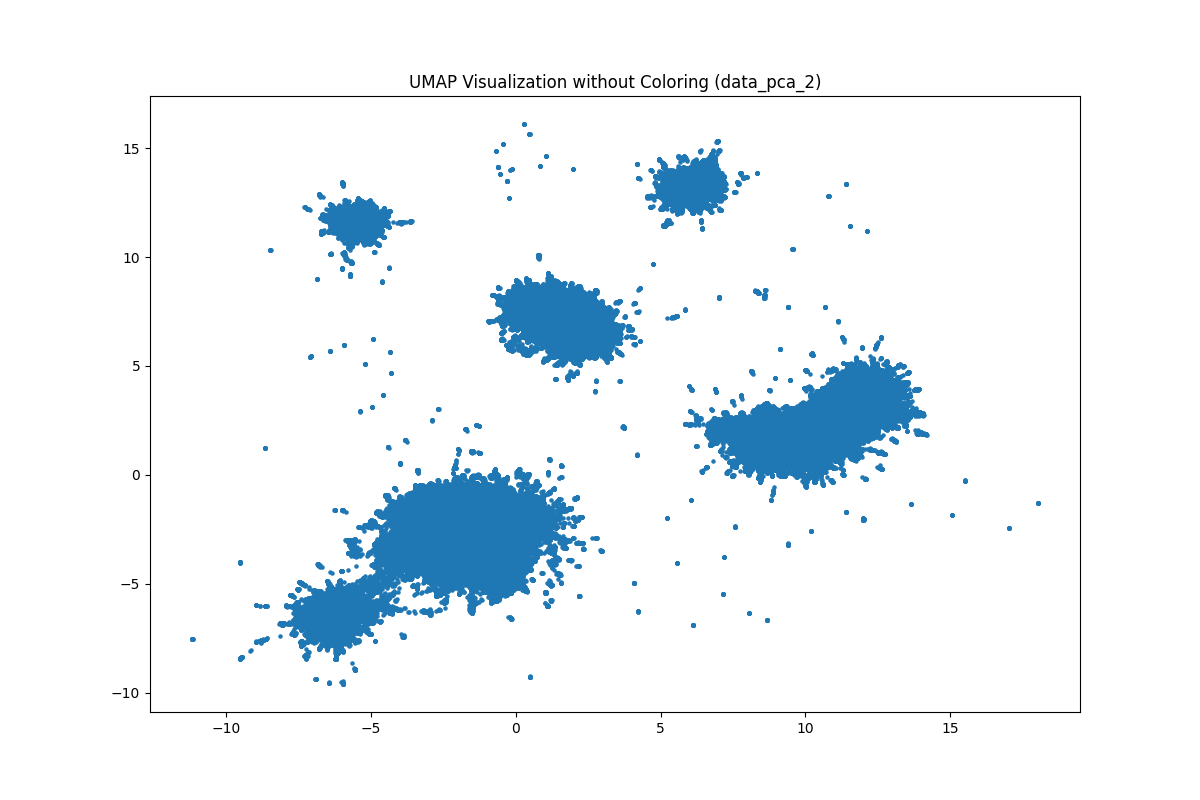

In [ ]:
import umap
import numpy as np
import matplotlib.pyplot as plt

# Предполагается, что data_pca_ уже загружены и представляют собой предварительно обработанные данные
np.random.seed(123)
# Визуализация UMAP без раскраски
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, metric='canberra', random_state=42)
umap_embeddings = umap_model.fit_transform(pca_3_clear)


# Создание датафрейма с индексами из исходного датафрейма
umap_df = pd.DataFrame(umap_embeddings, index=pca_3_clear.index)
umap_df.columns = ['UMAP_1', 'UMAP_2']

# Сохранение UMAP embeddings вместе с индексами
umap_df.to_csv('/content/drive/MyDrive/umap_embeddings_3_with_indices.csv')

# Визуализация
plt.figure(figsize=(12, 8))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], s=5)
plt.title('UMAP Visualization without Coloring (data_pca_3)')
plt.savefig('/content/drive/MyDrive/umap_visualization_data_pca_3.png')
plt.close()


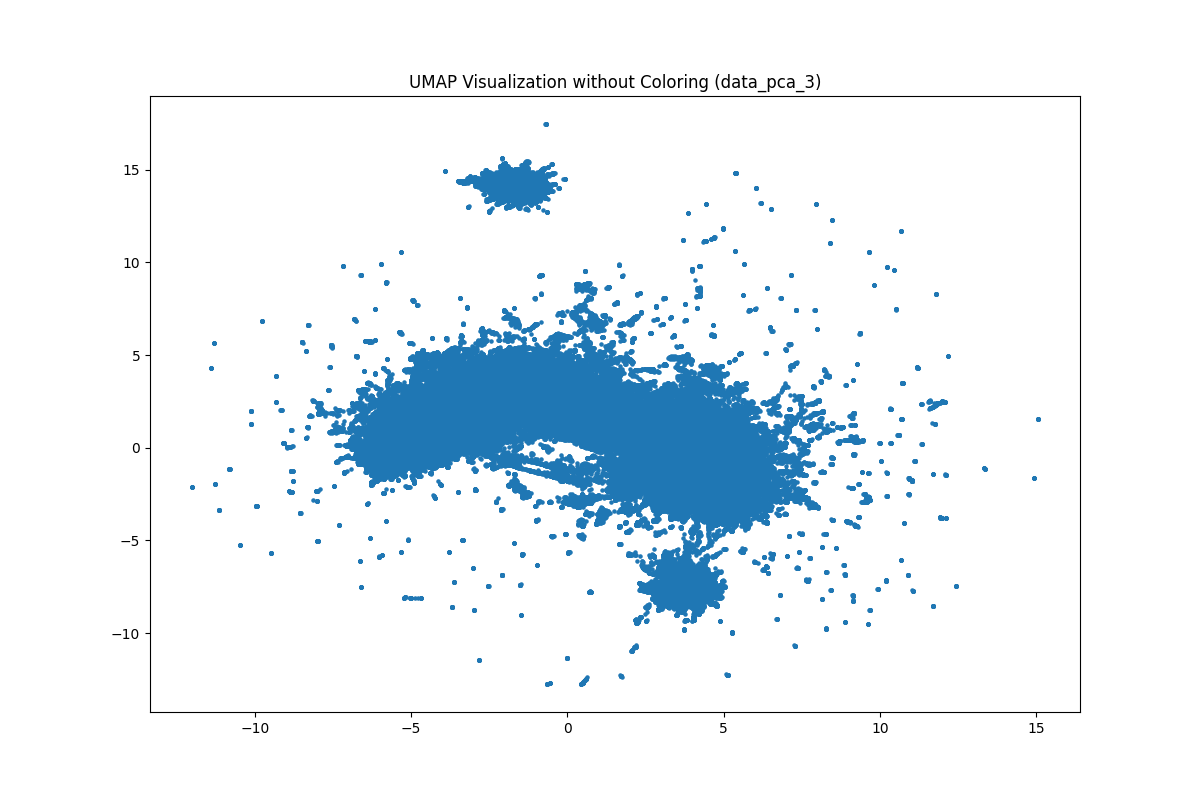

In [15]:
pca_1_clear

,Unnamed: 0,Yield,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,PC419,PC420,PC421,PC422,PC423,PC424,PC425,PC426,PC427,PC428
0,0,22.1,1.080310,0.812832,3.592814,-2.591554,-3.781133,2.095939,0.112994,2.226033,...,0.498749,1.181182,0.144764,0.081295,0.222464,0.292658,-0.194084,-0.287337,-3.267674,1.332522
1,10,28.0,-1.406542,-1.209123,0.202606,0.800967,-0.602355,-0.501475,-1.444422,-2.139393,...,0.013671,0.233112,-0.769385,-1.049600,0.820735,0.545815,-0.240822,1.385643,0.799345,0.394706
2,11,42.0,-1.370976,-0.107154,0.098117,-1.336981,0.371405,0.429233,-1.896359,-0.156844,...,0.511623,-0.798292,-1.583878,0.123542,0.654913,-1.033863,0.130009,0.084326,0.325533,-0.288053
3,12,51.0,-2.097067,0.146665,0.068581,-1.408931,-1.158586,0.586651,-2.375485,-0.656840,...,0.274157,-0.537434,-1.039219,0.230157,-0.618989,-0.481498,-0.009554,0.405544,1.418191,0.085230
4,16,7.0,1.062801,0.394144,-0.365016,-1.615260,-0.828321,0.019799,0.711498,-0.439149,...,0.434685,-0.508431,-1.099754,-0.619026,0.748021,-0.217936,-0.474071,0.835723,0.119095,-0.750401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191866,581932,34.8,4.419102,0.324469,-0.927701,-3.961565,-0.842061,-1.289714,3.281566,5.182477,...,0.882963,0.303218,0.573517,1.264271,-0.292793,0.628212,0.102656,-0.427430,-0.265436,-0.191958
191867,581941,28.4,2.863992,3.946777,2.955833,-2.185496,-1.860344,2.156981,-0.233254,1.806040,...,-0.565218,-0.068726,-0.368028,1.105314,-0.647844,-1.895027,0.193382,-0.251056,0.708674,1.431825
191868,581943,34.4,-1.047140,2.236456,-1.563263,-1.403039,-0.783511,0.516393,-1.084094,-0.959602,...,0.736070,-0.472348,0.026872,0.471040,-1.200768,1.683215,-0.615971,0.626726,-0.171737,-0.353687
191869,581946,44.1,0.389974,0.263992,1.826046,-2.126457,0.316617,-2.547531,2.696080,1.956313,...,1.006558,0.037814,0.337034,0.492471,0.443903,-0.465555,-0.079617,-0.987221,0.874277,0.182061


Считаем также в **3D** пространстве для всех трех:

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


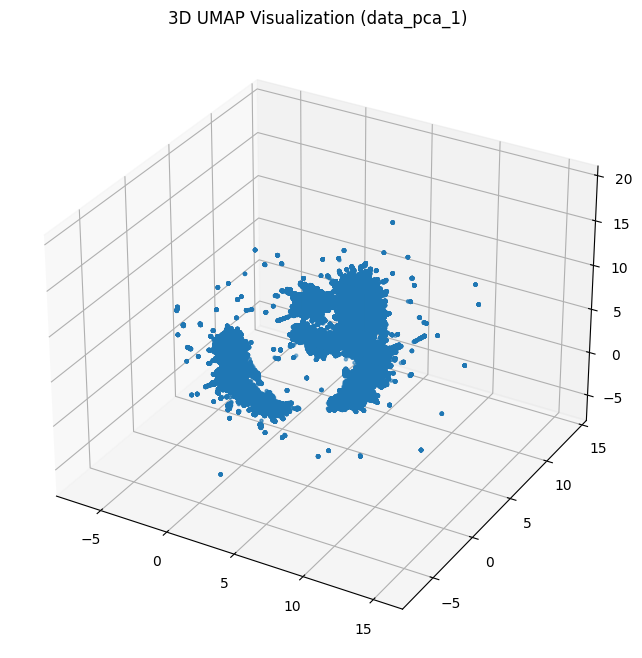

In [17]:
import umap
import umap.umap_ as umap
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd


pca_1_clear = pd.read_csv('/content/drive/MyDrive/pca_1_clear.csv')

# Предполагается, что data_pca_ уже загружены и представляют собой предварительно обработанные данные
np.random.seed(123)

# Вычисление UMAP в трехмерном пространстве
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=3, metric='canberra', random_state=42)
umap_embeddings = umap_model.fit_transform(pca_1_clear)

# Создание датафрейма с индексами из исходного датафрейма
umap_df = pd.DataFrame(umap_embeddings, index=pca_1_clear.index)
umap_df.columns = ['UMAP_1', 'UMAP_2', 'UMAP_3']

# Сохранение UMAP embeddings вместе с индексами
umap_df.to_csv('/content/drive/MyDrive/umap_embeddings_1_with_indices_3d.csv')

# Визуализация в 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], umap_embeddings[:, 2], s=5)
ax.set_title('3D UMAP Visualization (data_pca_1)')
plt.savefig('/content/drive/MyDrive/umap_1_visualization_data_pca_3d.png')

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


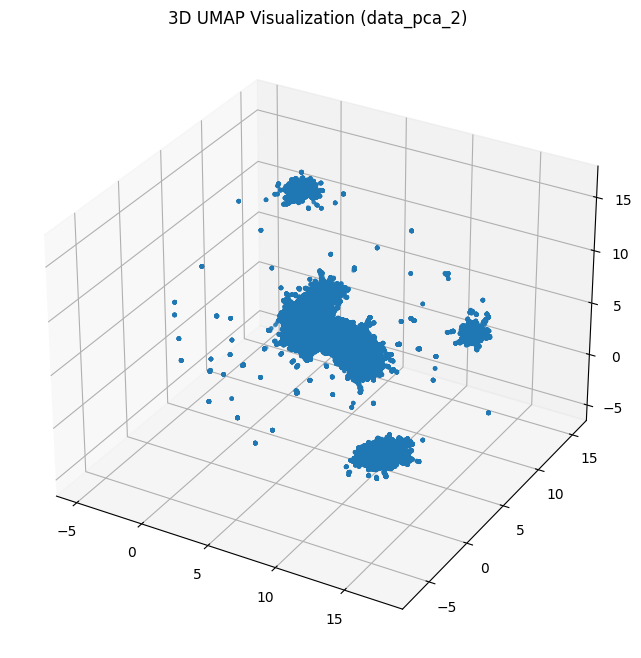

In [3]:
import umap
import umap.umap_ as umap
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd


pca_2_clear = pd.read_csv('/content/drive/MyDrive/pca_2_clear.csv')

# Предполагается, что data_pca_ уже загружены и представляют собой предварительно обработанные данные
np.random.seed(123)

# Вычисление UMAP в трехмерном пространстве
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=3, metric='canberra', random_state=42)
umap_embeddings = umap_model.fit_transform(pca_2_clear)

# Создание датафрейма с индексами из исходного датафрейма
umap_df = pd.DataFrame(umap_embeddings, index=pca_2_clear.index)
umap_df.columns = ['UMAP_1', 'UMAP_2', 'UMAP_3']

# Сохранение UMAP embeddings вместе с индексами
umap_df.to_csv('/content/drive/MyDrive/umap_embeddings_2_with_indices_3d.csv')

# Визуализация в 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], umap_embeddings[:, 2], s=5)
ax.set_title('3D UMAP Visualization (data_pca_2)')
plt.savefig('/content/drive/MyDrive/umap_2_visualization_data_pca_3d.png')

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


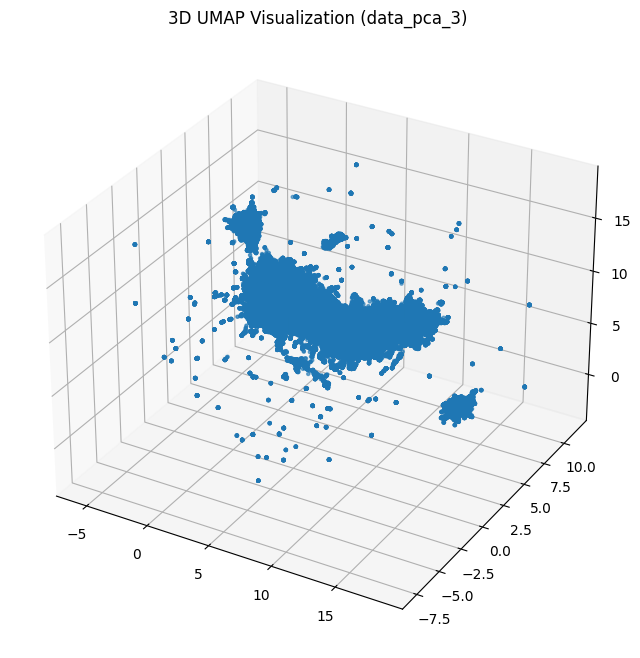

In [4]:
import umap
import umap.umap_ as umap
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd


pca_3_clear = pd.read_csv('/content/drive/MyDrive/pca_3_clear.csv')

# Предполагается, что data_pca_ уже загружены и представляют собой предварительно обработанные данные
np.random.seed(123)

# Вычисление UMAP в трехмерном пространстве
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=3, metric='canberra', random_state=42)
umap_embeddings = umap_model.fit_transform(pca_3_clear)

# Создание датафрейма с индексами из исходного датафрейма
umap_df = pd.DataFrame(umap_embeddings, index=pca_3_clear.index)
umap_df.columns = ['UMAP_1', 'UMAP_2', 'UMAP_3']

# Сохранение UMAP embeddings вместе с индексами
umap_df.to_csv('/content/drive/MyDrive/umap_embeddings_3_with_indices_3d.csv')

# Визуализация в 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], umap_embeddings[:, 2], s=5)
ax.set_title('3D UMAP Visualization (data_pca_3)')
plt.savefig('/content/drive/MyDrive/umap_3_visualization_data_pca_3d.png')

### **GaussianMixture**

Далее, мы провели кластеризацию **GaussianMixture** для 1 датасета 2D:


In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


# Загрузка датафреймов
df1 = pd.read_csv('/content/drive/MyDrive/umap_embeddings_1_with_indices.csv')
df2 = pd.read_csv('/content/drive/MyDrive/umap_embeddings_2_with_indices.csv')
df3 = pd.read_csv('/content/drive/MyDrive/umap_embeddings_3_with_indices.csv')

# Кластеризация
gmm1 = GaussianMixture(n_components=4, random_state=42)
gmm1.fit(df1)
cluster_labels1 = gmm1.predict(df1)

# Визуализация кластеров
plt.figure(figsize=(10, 8))
for i in range(cluster_labels.max() + 1):
    plt.scatter(df1[cluster_labels == i]['UMAP_1'], df1[cluster_labels == i]['UMAP_2'], label=f'Cluster {i}')
plt.title('HDBSCAN Cluster Visualization')
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.legend()
plt.show()

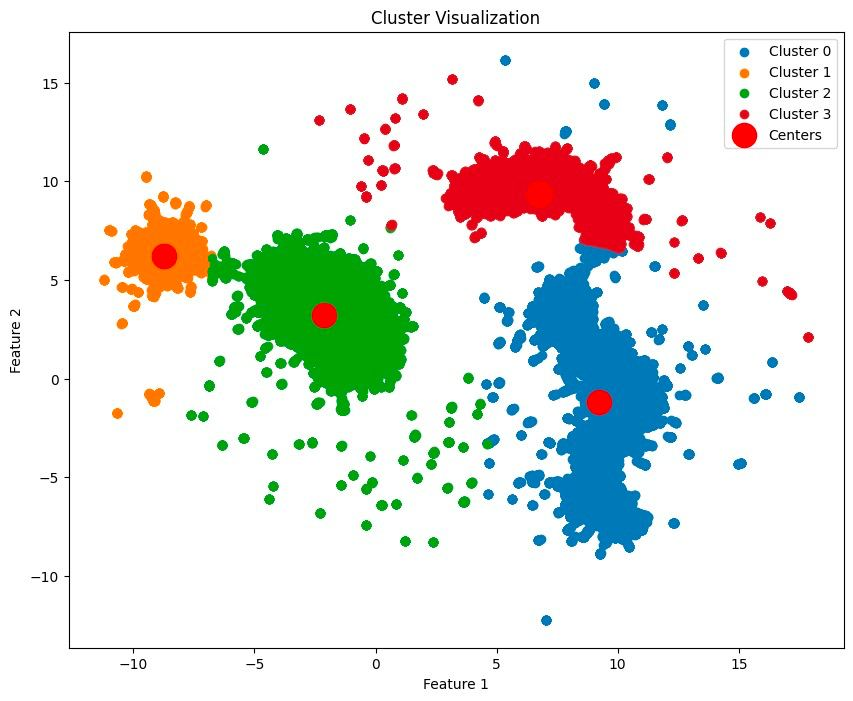

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Вычисление Silhouette Score
silhouette_avg = silhouette_score(df1, cluster_labels)
print("The average silhouette_score is :", silhouette_avg)

# Вычисление Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(df1, cluster_labels)
print("The Calinski-Harabasz Index is:", calinski_harabasz)

# Вычисление Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(df1, cluster_labels)
print("The Davies-Bouldin Index is:", davies_bouldin)


Получились следующие **метрики**:

1. The average silhouette_score is : 0.4414242511129067
2. The Calinski-Harabasz Index is: 482080.1834278382
3. The Davies-Bouldin Index is: 0.6507438258518145

**Теперь считаем то же для 1 датасета 3D:**

In [9]:
# umap_df = pd.read_csv('/content/drive/MyDrive/umap_embeddings_1_with_indices_3d.csv')
# umap_df = umap_df.drop(['Unnamed: 0'], axis=1)
# umap_df.to_csv('/content/drive/MyDrive/umap_embeddings_1_with_indices_3d.csv', index=False)
umap_df

,UMAP_1,UMAP_2,UMAP_3
0,6.974117,-2.618463,15.551901
1,7.104490,-3.010365,15.492928
2,6.774991,-2.508895,15.350884
3,6.792809,-2.519376,15.214625
4,7.086010,-2.951974,15.517140
...,...,...,...
191866,-0.470187,0.047032,6.252457
191867,-0.872819,0.127817,6.358087
191868,-0.784719,0.114058,6.301270
191869,-0.516611,0.069960,6.248414


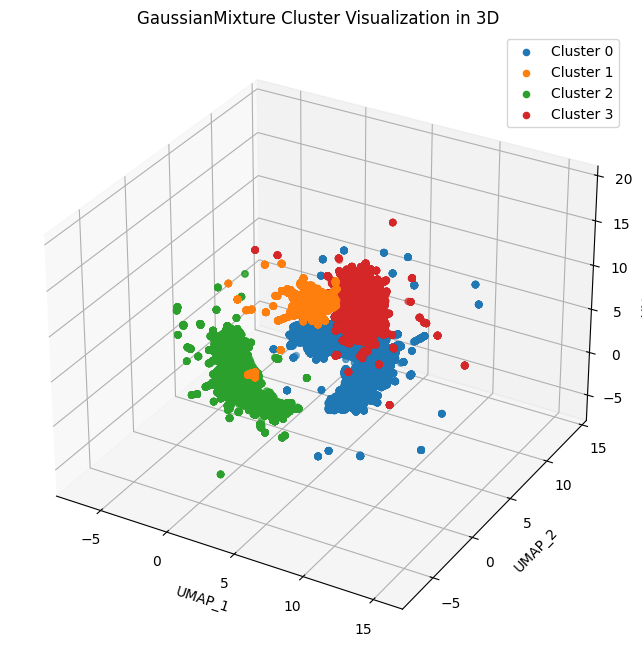

The average silhouette_score is : 0.6347981323376041
The Calinski-Harabasz Index is: 418426.2119082469
The Davies-Bouldin Index is: 0.5088064898034483


In [16]:
from sklearn.mixture import GaussianMixture

umap_df = pd.read_csv('/content/drive/MyDrive/umap_embeddings_1_with_indices_3d.csv')

# Кластеризация
gmm1 = GaussianMixture(n_components=4, random_state=42)
gmm1.fit(umap_df)
cluster_labels1 = gmm1.predict(umap_df)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Создание 3D графика
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Визуализация кластеров
for i in range(cluster_labels1.max() + 1):
    ax.scatter(umap_df[cluster_labels1 == i]['UMAP_1'],
               umap_df[cluster_labels1 == i]['UMAP_2'],
               umap_df[cluster_labels1 == i]['UMAP_3'], # Добавление третьего измерения
               label=f'Cluster {i}')

# Установка названий осей и заголовка
ax.set_title('GaussianMixture Cluster Visualization in 3D')
ax.set_xlabel('UMAP_1')
ax.set_ylabel('UMAP_2')
ax.set_zlabel('UMAP_3') # Название оси Z
plt.legend()

# Отображение графика
plt.show()

# Вычисление Silhouette Score
silhouette_avg = silhouette_score(umap_df[['UMAP_1', 'UMAP_2', 'UMAP_3']], cluster_labels1)
print("The average silhouette_score is :", silhouette_avg)

# Вычисление Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(umap_df[['UMAP_1', 'UMAP_2', 'UMAP_3']], cluster_labels1)
print("The Calinski-Harabasz Index is:", calinski_harabasz)

# Вычисление Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(umap_df[['UMAP_1', 'UMAP_2', 'UMAP_3']], cluster_labels1)
print("The Davies-Bouldin Index is:", davies_bouldin)


Считаем **GaussianMixture** для 2 датасета 2D:

In [27]:
# Кластеризация
umap_df = pd.read_csv('/content/drive/MyDrive/umap_embeddings_2_with_indices.csv')


gmm1 = GaussianMixture(n_components=5, random_state=42)
gmm1.fit(umap_df)
cluster_labels1 = gmm1.predict(umap_df)

# Визуализация кластеров
plt.figure(figsize=(10, 8))
for i in range(cluster_labels.max() + 1):
    plt.scatter(umap_df[cluster_labels == i]['UMAP_1'], umap_df[cluster_labels == i]['UMAP_2'], label=f'Cluster {i}')
plt.title('HDBSCAN Cluster Visualization')
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.legend()
plt.show()

ValueError: Item wrong length 197685 instead of 192404.

<Figure size 1000x800 with 0 Axes>

Считаем **GaussianMixture** для 2 датасета 3D:

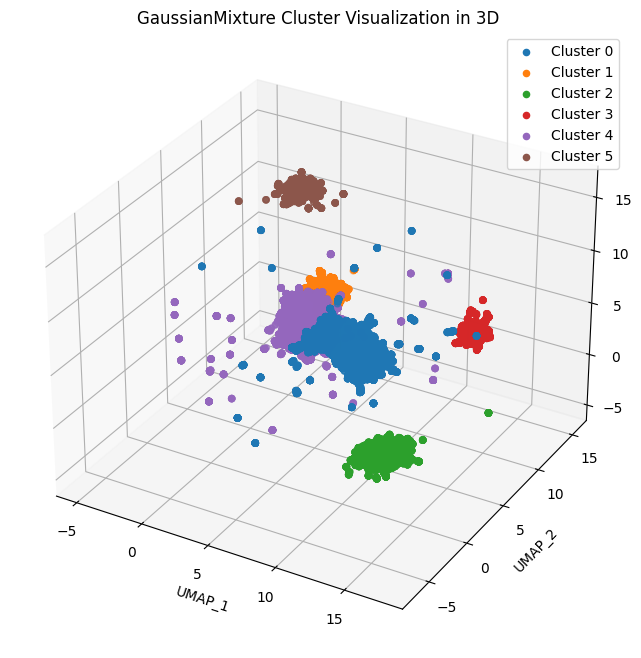

The average silhouette_score is : 0.7410109226712237
The Calinski-Harabasz Index is: 806741.401501334
The Davies-Bouldin Index is: 0.3070102265373404


In [3]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


umap_df = pd.read_csv('/content/drive/MyDrive/umap_embeddings_2_with_indices_3d.csv')


# Кластеризация
gmm1 = GaussianMixture(n_components=5, random_state=42)
gmm1.fit(umap_df)
cluster_labels1 = gmm1.predict(umap_df)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Создание 3D графика
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Визуализация кластеров
for i in range(cluster_labels1.max() + 1):
    ax.scatter(umap_df[cluster_labels1 == i]['UMAP_1'],
               umap_df[cluster_labels1 == i]['UMAP_2'],
               umap_df[cluster_labels1 == i]['UMAP_3'], # Добавление третьего измерения
               label=f'Cluster {i}')

# Установка названий осей и заголовка
ax.set_title('GaussianMixture Cluster Visualization in 3D')
ax.set_xlabel('UMAP_1')
ax.set_ylabel('UMAP_2')
ax.set_zlabel('UMAP_3') # Название оси Z
plt.legend()

# Отображение графика
plt.show()

# Вычисление Silhouette Score
silhouette_avg = silhouette_score(umap_df[['UMAP_1', 'UMAP_2', 'UMAP_3']], cluster_labels1)
print("The average silhouette_score is :", silhouette_avg)

# Вычисление Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(umap_df[['UMAP_1', 'UMAP_2', 'UMAP_3']], cluster_labels1)
print("The Calinski-Harabasz Index is:", calinski_harabasz)

# Вычисление Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(umap_df[['UMAP_1', 'UMAP_2', 'UMAP_3']], cluster_labels1)
print("The Davies-Bouldin Index is:", davies_bouldin)

Считаем **GaussianMixture** для 3 датасета 2D:

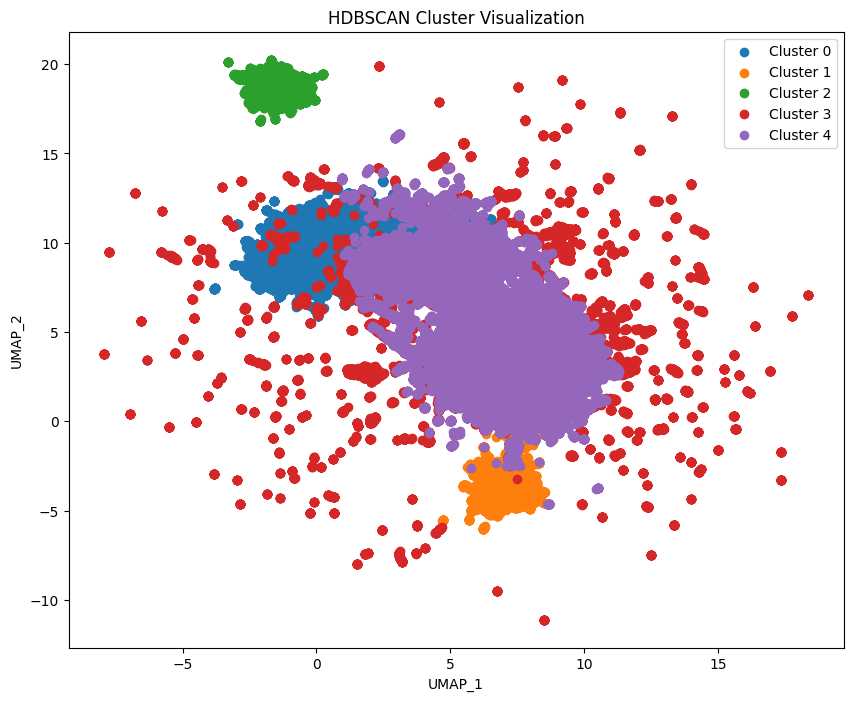

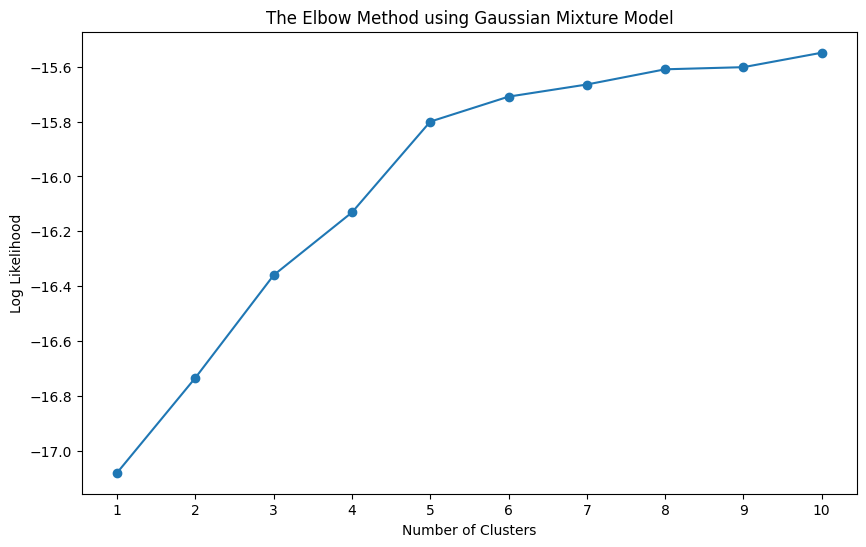

The average silhouette_score is : 0.2313062249932545
The Calinski-Harabasz Index is: 173615.50436832258
The Davies-Bouldin Index is: 2.4943485547204247


In [24]:
# Кластеризация
umap_df = pd.read_csv('/content/drive/MyDrive/umap_embeddings_3_with_indices.csv')


gmm1 = GaussianMixture(n_components=5, random_state=42)
gmm1.fit(umap_df)
cluster_labels = gmm1.predict(umap_df)

# Визуализация кластеров
plt.figure(figsize=(10, 8))
for i in range(cluster_labels.max() + 1):
    plt.scatter(umap_df[cluster_labels == i]['UMAP_1'], umap_df[cluster_labels == i]['UMAP_2'], label=f'Cluster {i}')
plt.title('HDBSCAN Cluster Visualization')
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.legend()
plt.show()


# Определение диапазона количества кластеров для проверки
n_clusters = range(1, 11)

# Массив для хранения логарифма правдоподобия для каждого количества кластеров
log_likelihood = []

# Применение Гауссовой смеси моделей для разного количества кластеров
for n in n_clusters:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(umap_df)
    # Запись логарифма правдоподобия модели
    log_likelihood.append(gmm.score(umap_df))

# Визуализация результатов метода локтя
plt.figure(figsize=(10, 6))
plt.plot(n_clusters, log_likelihood, marker='o')
plt.title('The Elbow Method using Gaussian Mixture Model')
plt.xlabel('Number of Clusters')
plt.ylabel('Log Likelihood')
plt.xticks(n_clusters)
plt.show()


# Вычисление Silhouette Score
silhouette_avg = silhouette_score(umap_df, cluster_labels)
print("The average silhouette_score is :", silhouette_avg)

# Вычисление Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(umap_df, cluster_labels)
print("The Calinski-Harabasz Index is:", calinski_harabasz)

# Вычисление Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(umap_df, cluster_labels)
print("The Davies-Bouldin Index is:", davies_bouldin)



Считаем **GaussianMixture** для 3 датасета 3D:

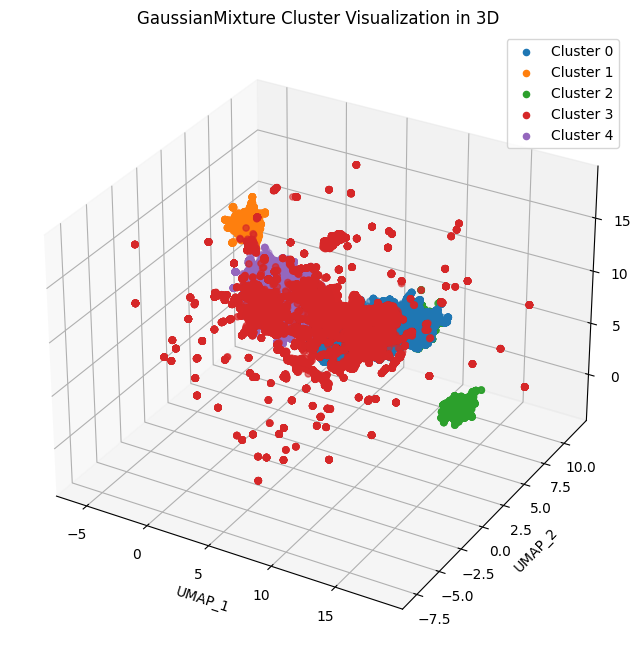

The average silhouette_score is : 0.37884898532808586
The Calinski-Harabasz Index is: 162987.46064944525
The Davies-Bouldin Index is: 1.3096686930795065


In [25]:
from sklearn.mixture import GaussianMixture


umap_df = pd.read_csv('/content/drive/MyDrive/umap_embeddings_3_with_indices_3d.csv')


# Кластеризация
gmm1 = GaussianMixture(n_components=5, random_state=42)
gmm1.fit(umap_df)
cluster_labels1 = gmm1.predict(umap_df)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Создание 3D графика
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Визуализация кластеров
for i in range(cluster_labels1.max() + 1):
    ax.scatter(umap_df[cluster_labels1 == i]['UMAP_1'],
               umap_df[cluster_labels1 == i]['UMAP_2'],
               umap_df[cluster_labels1 == i]['UMAP_3'], # Добавление третьего измерения
               label=f'Cluster {i}')

# Установка названий осей и заголовка
ax.set_title('GaussianMixture Cluster Visualization in 3D')
ax.set_xlabel('UMAP_1')
ax.set_ylabel('UMAP_2')
ax.set_zlabel('UMAP_3') # Название оси Z
plt.legend()

# Отображение графика
plt.show()

# Вычисление Silhouette Score
silhouette_avg = silhouette_score(umap_df[['UMAP_1', 'UMAP_2', 'UMAP_3']], cluster_labels1)
print("The average silhouette_score is :", silhouette_avg)

# Вычисление Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(umap_df[['UMAP_1', 'UMAP_2', 'UMAP_3']], cluster_labels1)
print("The Calinski-Harabasz Index is:", calinski_harabasz)

# Вычисление Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(umap_df[['UMAP_1', 'UMAP_2', 'UMAP_3']], cluster_labels1)
print("The Davies-Bouldin Index is:", davies_bouldin)

### **KMeans:**

Провели 3D кластеризацию **KMeans** для 1 датасета:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


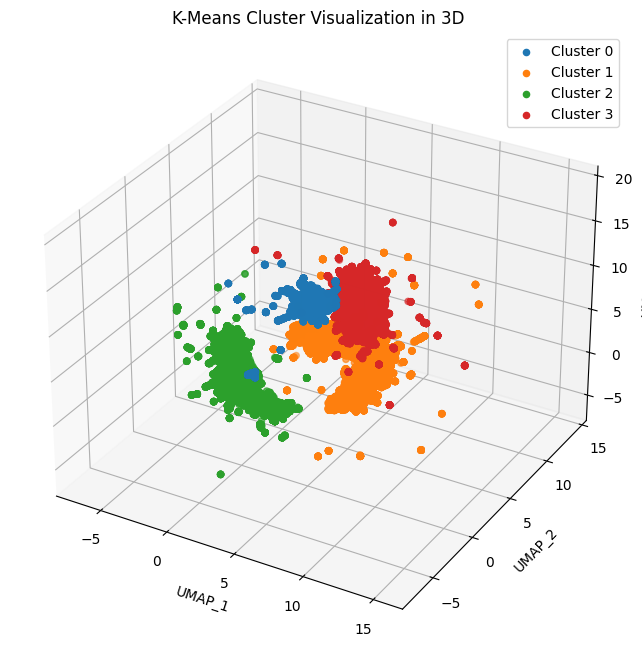

The average silhouette_score is : 0.6347981323376041
The Calinski-Harabasz Index is: 418426.2119082469
The Davies-Bouldin Index is: 0.5088064898034483


In [26]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

umap_df = pd.read_csv('/content/drive/MyDrive/umap_embeddings_1_with_indices_3d.csv')

# Применение K-Means для кластеризации
kmeans = KMeans(n_clusters=4)
umap_df['kmeans_labels'] = kmeans.fit_predict(umap_df[['UMAP_1', 'UMAP_2', 'UMAP_3']])

# Создание 3D графика
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Визуализация кластеров
for i in range(kmeans.n_clusters):
    ax.scatter(umap_df[umap_df['kmeans_labels'] == i]['UMAP_1'],
               umap_df[umap_df['kmeans_labels'] == i]['UMAP_2'],
               umap_df[umap_df['kmeans_labels'] == i]['UMAP_3'],
               label=f'Cluster {i}')

ax.set_title('K-Means Cluster Visualization in 3D')
ax.set_xlabel('UMAP_1')
ax.set_ylabel('UMAP_2')
ax.set_zlabel('UMAP_3')
plt.legend()
plt.show()

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Вычисление Silhouette Score
silhouette_avg = silhouette_score(umap_df[['UMAP_1', 'UMAP_2', 'UMAP_3']], umap_df['kmeans_labels'])
print("The average silhouette_score is :", silhouette_avg)

# Вычисление Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(umap_df[['UMAP_1', 'UMAP_2', 'UMAP_3']], umap_df['kmeans_labels'])
print("The Calinski-Harabasz Index is:", calinski_harabasz)

# Вычисление Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(umap_df[['UMAP_1', 'UMAP_2', 'UMAP_3']], umap_df['kmeans_labels'])
print("The Davies-Bouldin Index is:", davies_bouldin)



И 2D кластеризацию:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


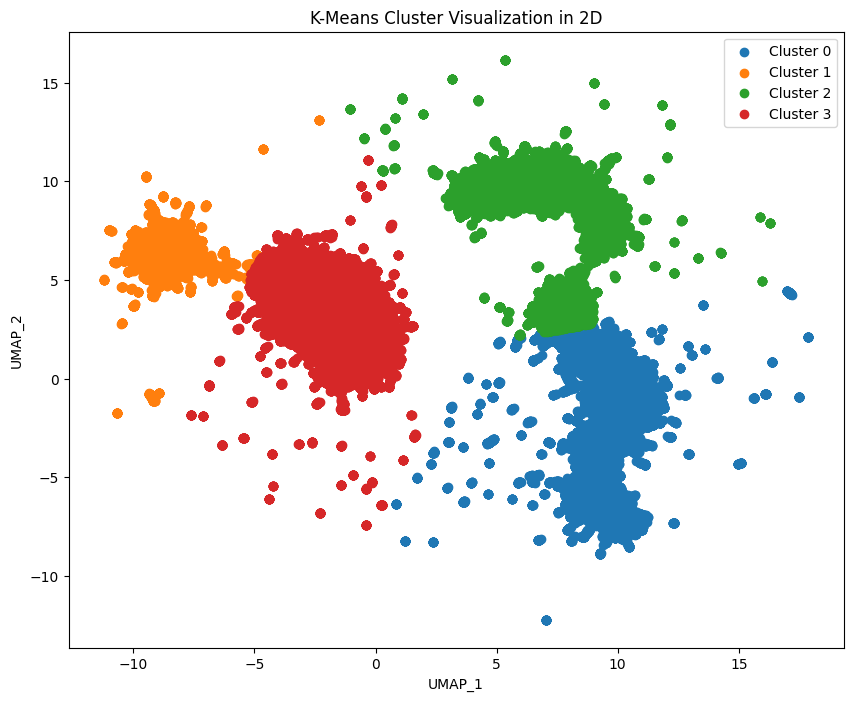

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


umap_df = pd.read_csv('/content/drive/MyDrive/umap_embeddings_1_with_indices.csv')

# Применение K-Means для кластеризации
kmeans = KMeans(n_clusters=4)
umap_df['kmeans_labels'] = kmeans.fit_predict(umap_df[['UMAP_1', 'UMAP_2']])

# Создание 2D графика для визуализации
plt.figure(figsize=(10, 8))

# Визуализация кластеров
for i in range(kmeans.n_clusters):
    plt.scatter(umap_df[umap_df['kmeans_labels'] == i]['UMAP_1'],
                umap_df[umap_df['kmeans_labels'] == i]['UMAP_2'],
                label=f'Cluster {i}')

plt.title('K-Means Cluster Visualization in 2D')
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.legend()
plt.show()

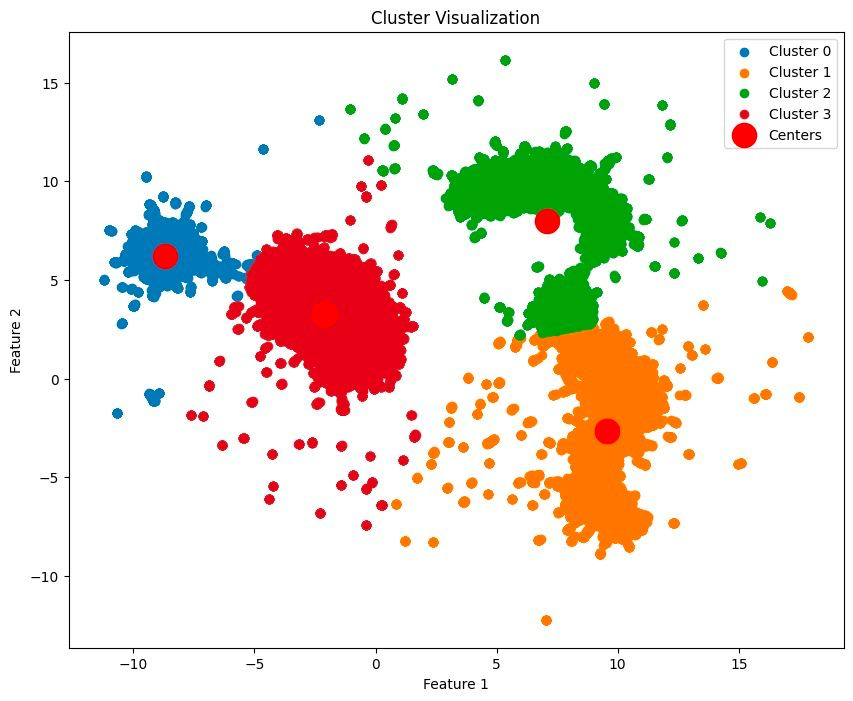

In [29]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Вычисление Silhouette Score
silhouette_avg = silhouette_score(umap_df[['UMAP_1', 'UMAP_2']], umap_df['kmeans_labels'])
print("The average silhouette_score is :", silhouette_avg)

# Вычисление Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(umap_df[['UMAP_1', 'UMAP_2']], umap_df['kmeans_labels'])
print("The Calinski-Harabasz Index is:", calinski_harabasz)

# Вычисление Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(umap_df[['UMAP_1', 'UMAP_2']], umap_df['kmeans_labels'])
print("The Davies-Bouldin Index is:", davies_bouldin)

The average silhouette_score is : 0.6106421274536167
The Calinski-Harabasz Index is: 451854.2427162986
The Davies-Bouldin Index is: 0.5021627677568751


Получились следующие **метрики** **KMeans**:

1. The average silhouette_score is : 0.6106337190596322
2. The Calinski-Harabasz Index is: 451854.05679797026
3. The Davies-Bouldin Index is: 0.5022154985433838 метрики kmeans

2D для 2 датасета:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


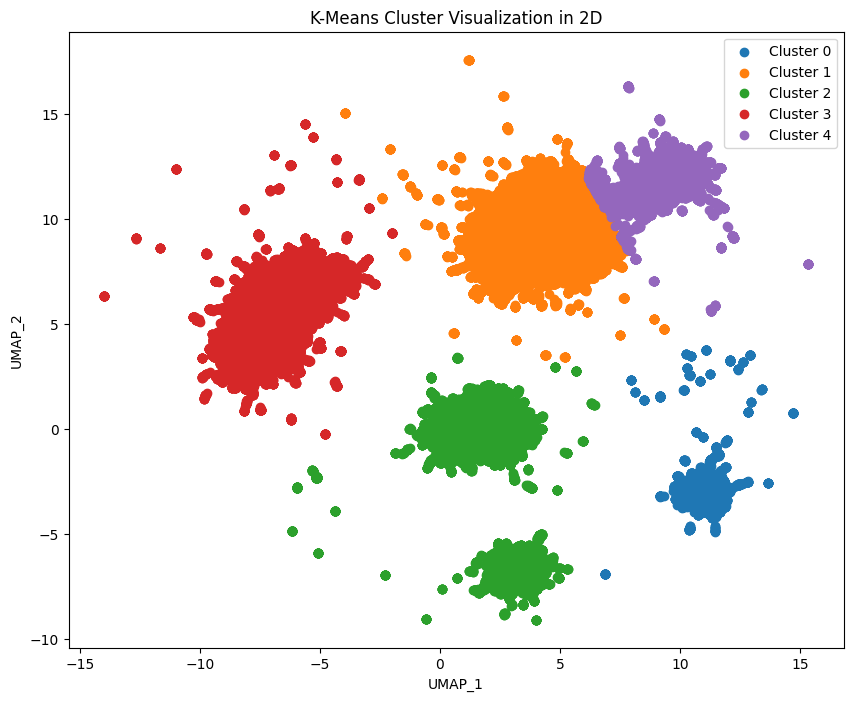

The average silhouette_score is : 0.6500765694216699
The Calinski-Harabasz Index is: 513547.2649116465
The Davies-Bouldin Index is: 0.4572740855870242


In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


umap_df = pd.read_csv('/content/drive/MyDrive/umap_embeddings_2_with_indices.csv')

# Применение K-Means для кластеризации
kmeans = KMeans(n_clusters=5)
umap_df['kmeans_labels'] = kmeans.fit_predict(umap_df[['UMAP_1', 'UMAP_2']])

# Создание 2D графика для визуализации
plt.figure(figsize=(10, 8))

# Визуализация кластеров
for i in range(kmeans.n_clusters):
    plt.scatter(umap_df[umap_df['kmeans_labels'] == i]['UMAP_1'],
                umap_df[umap_df['kmeans_labels'] == i]['UMAP_2'],
                label=f'Cluster {i}')

plt.title('K-Means Cluster Visualization in 2D')
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.legend()
plt.show()

# Вычисление Silhouette Score
silhouette_avg = silhouette_score(umap_df[['UMAP_1', 'UMAP_2']], umap_df['kmeans_labels'])
print("The average silhouette_score is :", silhouette_avg)

# Вычисление Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(umap_df[['UMAP_1', 'UMAP_2']], umap_df['kmeans_labels'])
print("The Calinski-Harabasz Index is:", calinski_harabasz)

# Вычисление Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(umap_df[['UMAP_1', 'UMAP_2']], umap_df['kmeans_labels'])
print("The Davies-Bouldin Index is:", davies_bouldin)

3D для 2 датасета:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


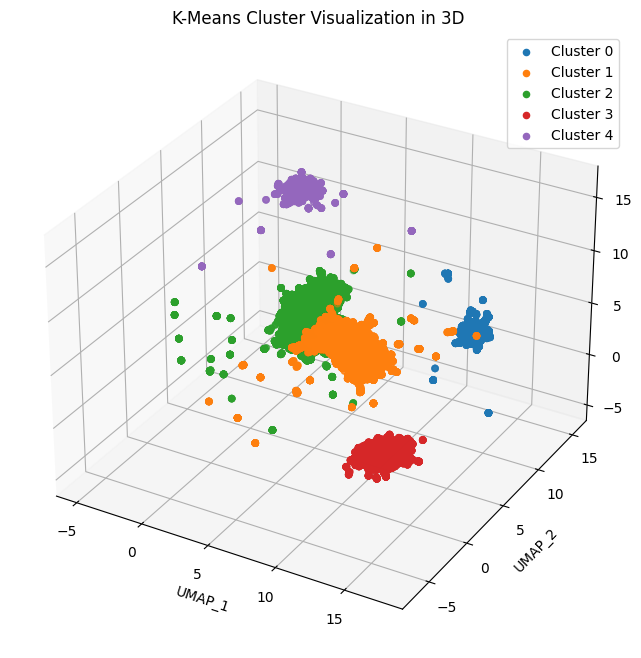

The average silhouette_score is : 0.7623912533870024
The Calinski-Harabasz Index is: 516267.1755532759
The Davies-Bouldin Index is: 0.3160962557233139


In [34]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

umap_df = pd.read_csv('/content/drive/MyDrive/umap_embeddings_2_with_indices_3d.csv')

# Применение K-Means для кластеризации
kmeans = KMeans(n_clusters=5)
umap_df['kmeans_labels'] = kmeans.fit_predict(umap_df[['UMAP_1', 'UMAP_2', 'UMAP_3']])

# Создание 3D графика
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Визуализация кластеров
for i in range(kmeans.n_clusters):
    ax.scatter(umap_df[umap_df['kmeans_labels'] == i]['UMAP_1'],
               umap_df[umap_df['kmeans_labels'] == i]['UMAP_2'],
               umap_df[umap_df['kmeans_labels'] == i]['UMAP_3'],
               label=f'Cluster {i}')

ax.set_title('K-Means Cluster Visualization in 3D')
ax.set_xlabel('UMAP_1')
ax.set_ylabel('UMAP_2')
ax.set_zlabel('UMAP_3')
plt.legend()
plt.show()

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Вычисление Silhouette Score
silhouette_avg = silhouette_score(umap_df[['UMAP_1', 'UMAP_2', 'UMAP_3']], umap_df['kmeans_labels'])
print("The average silhouette_score is :", silhouette_avg)

# Вычисление Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(umap_df[['UMAP_1', 'UMAP_2', 'UMAP_3']], umap_df['kmeans_labels'])
print("The Calinski-Harabasz Index is:", calinski_harabasz)

# Вычисление Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(umap_df[['UMAP_1', 'UMAP_2', 'UMAP_3']], umap_df['kmeans_labels'])
print("The Davies-Bouldin Index is:", davies_bouldin)


2D для 3 датасета:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


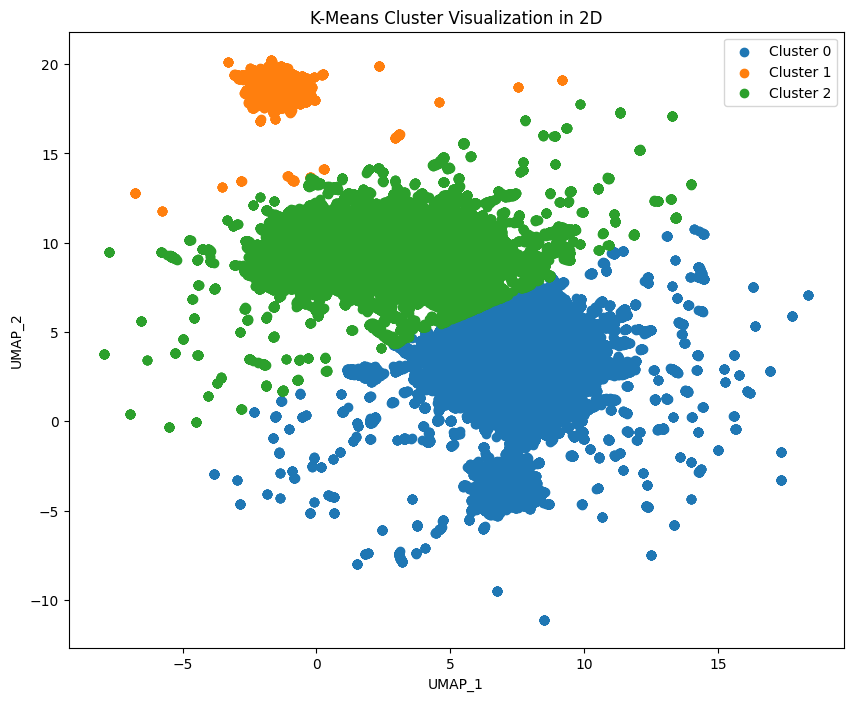

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


umap_df = pd.read_csv('/content/drive/MyDrive/umap_embeddings_3_with_indices.csv')

# Применение K-Means для кластеризации
kmeans = KMeans(n_clusters=3)
umap_df['kmeans_labels'] = kmeans.fit_predict(umap_df[['UMAP_1', 'UMAP_2']])

# Создание 2D графика для визуализации
plt.figure(figsize=(10, 8))

# Визуализация кластеров
for i in range(kmeans.n_clusters):
    plt.scatter(umap_df[umap_df['kmeans_labels'] == i]['UMAP_1'],
                umap_df[umap_df['kmeans_labels'] == i]['UMAP_2'],
                label=f'Cluster {i}')

plt.title('K-Means Cluster Visualization in 2D')
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.legend()
plt.show()

In [6]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Вычисление Silhouette Score
silhouette_avg = silhouette_score(umap_df[['UMAP_1', 'UMAP_2']], umap_df['kmeans_labels'])
print("The average silhouette_score is :", silhouette_avg)

# Вычисление Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(umap_df[['UMAP_1', 'UMAP_2']], umap_df['kmeans_labels'])
print("The Calinski-Harabasz Index is:", calinski_harabasz)

# Вычисление Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(umap_df[['UMAP_1', 'UMAP_2']], umap_df['kmeans_labels'])
print("The Davies-Bouldin Index is:", davies_bouldin)

The average silhouette_score is : 0.5219046293111568
The Calinski-Harabasz Index is: 289938.51624959585
The Davies-Bouldin Index is: 0.5653216196646413


3D для 3 датасета:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


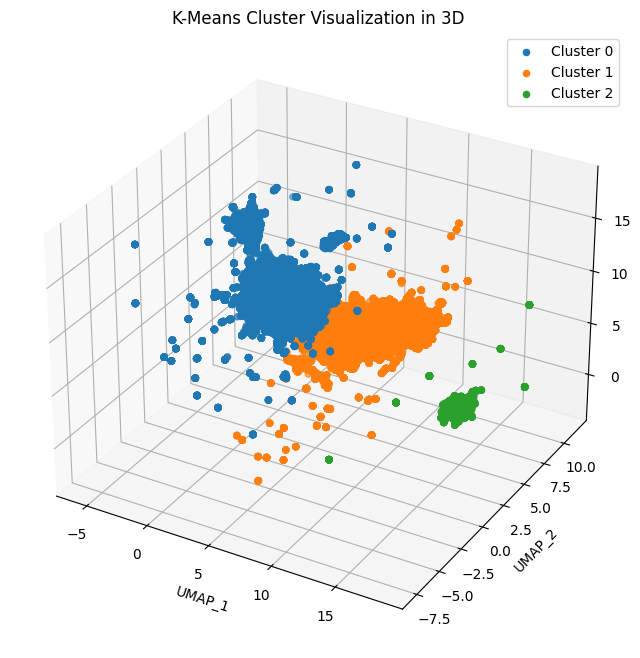

The average silhouette_score is : 0.5589382718448795
The Calinski-Harabasz Index is: 299468.56726184866
The Davies-Bouldin Index is: 0.5522156383186895


In [38]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

umap_df = pd.read_csv('/content/drive/MyDrive/umap_embeddings_3_with_indices_3d.csv')

# Применение K-Means для кластеризации
kmeans = KMeans(n_clusters=3)
umap_df['kmeans_labels'] = kmeans.fit_predict(umap_df[['UMAP_1', 'UMAP_2', 'UMAP_3']])

# Создание 3D графика
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Визуализация кластеров
for i in range(kmeans.n_clusters):
    ax.scatter(umap_df[umap_df['kmeans_labels'] == i]['UMAP_1'],
               umap_df[umap_df['kmeans_labels'] == i]['UMAP_2'],
               umap_df[umap_df['kmeans_labels'] == i]['UMAP_3'],
               label=f'Cluster {i}')

ax.set_title('K-Means Cluster Visualization in 3D')
ax.set_xlabel('UMAP_1')
ax.set_ylabel('UMAP_2')
ax.set_zlabel('UMAP_3')
plt.legend()
plt.show()

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Вычисление Silhouette Score
silhouette_avg = silhouette_score(umap_df[['UMAP_1', 'UMAP_2', 'UMAP_3']], umap_df['kmeans_labels'])
print("The average silhouette_score is :", silhouette_avg)

# Вычисление Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(umap_df[['UMAP_1', 'UMAP_2', 'UMAP_3']], umap_df['kmeans_labels'])
print("The Calinski-Harabasz Index is:", calinski_harabasz)

# Вычисление Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(umap_df[['UMAP_1', 'UMAP_2', 'UMAP_3']], umap_df['kmeans_labels'])
print("The Davies-Bouldin Index is:", davies_bouldin)


Провели кластеризацию **HDBSCAN**:

In [ ]:
pip install

In [ ]:
import hdbscan

# Кластеризация с использованием HDBSCAN
hdbscan_cluster = hdbscan.HDBSCAN(min_cluster_size=7,min_samples =78, cluster_selection_epsilon=46, alpha =16.5, cluster_selection_method='eom')
cluster_labels = hdbscan_cluster.fit_predict(df1)

# Визуализация кластеров
plt.figure(figsize=(10, 8))
for i in range(cluster_labels.max() + 1):
    plt.scatter(df1[cluster_labels == i]['UMAP_1'], df1[cluster_labels == i]['UMAP_2'], label=f'Cluster {i}')
plt.title('HDBSCAN Cluster Visualization')
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.legend()
plt.show()


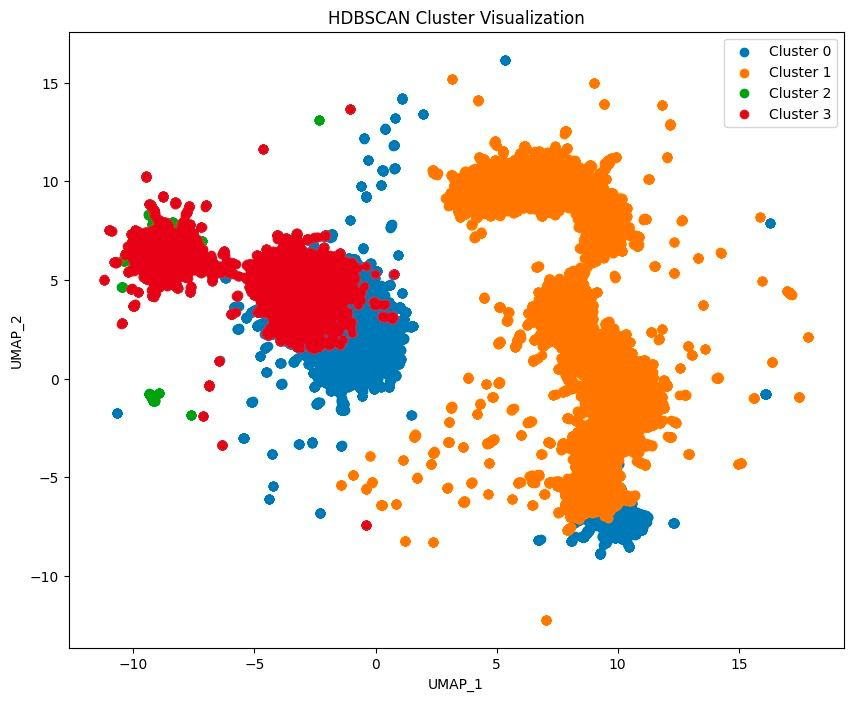

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Вычисление Silhouette Score
silhouette_avg = silhouette_score(df1, cluster_labels)
print("The average silhouette_score is :", silhouette_avg)

# Вычисление Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(df1, cluster_labels)
print("The Calinski-Harabasz Index is:", calinski_harabasz)

# Вычисление Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(df1, cluster_labels)
print("The Davies-Bouldin Index is:", davies_bouldin)


In [11]:
import hdbscan
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Предполагая, что у вас есть DataFrame umap_df с колонками 'UMAP_1', 'UMAP_2', 'UMAP_3'

# Применение HDBSCAN для кластеризации
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
cluster_labels = hdbscan_clusterer.fit_predict(umap_df[['UMAP_1', 'UMAP_2', 'UMAP_3']])

# Создание 3D графика для визуализации результатов
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Визуализация кластеров
unique_labels = np.unique(cluster_labels)
for label in unique_labels:
    ax.scatter(umap_df[cluster_labels == label]['UMAP_1'],
               umap_df[cluster_labels == label]['UMAP_2'],
               umap_df[cluster_labels == label]['UMAP_3'],
               label=f'Cluster {label}')

ax.set_title('HDBSCAN Cluster Visualization in 3D')
ax.set_xlabel('UMAP_1')
ax.set_ylabel('UMAP_2')
ax.set_zlabel('UMAP_3')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'hdbscan'

In [26]:
pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 10.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039280 sha256=fbcb9ad65e457fb4c5dd03345602eed4ea5ddf653479171ae21f63aacef2bc04
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.8
    Uninstalling Cython-3.0.8:
      Successfully uninstalled Cython-3.0.8


Получили следующие метрики **HDBSCAN**:


Провели кластеризацию **SpectralClustering**:

In [ ]:
import pandas as pd
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

# Загрузите ваш датафрейм
df1 = pd.read_csv('/content/drive/MyDrive/umap_embeddings_1_with_indices.csv')

# Инициализируем Spectral Clustering
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=42)

# Проведение кластеризации
cluster_labels_spectral = spectral.fit_predict(df1[['UMAP_1', 'UMAP_2']])

# Визуализация
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.scatter(df1[cluster_labels_spectral == i]['UMAP_1'], df1[cluster_labels_spectral == i]['UMAP_2'], label=f'Cluster {i}')

plt.title('Spectral Clustering')
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [12]:
import pandas as pd
import re

# Загрузка CSV файла
df = pd.read_csv('/content/drive/MyDrive/combined_dataset_final.csv')  # замените на путь к вашему файлу
df

# Функция для проверки наличия условия
def contains_condition(smiles_string):
    # Использование регулярных выражений для поиска условия
    match = re.search(r'>[^>]+>', smiles_string)
    return bool(match)

# Применение функции к столбцу 'smiles' и подсчет строк с условием
num_rows_with_condition = df['Smiles_reaction'].apply(contains_condition).sum()

print(f'Количество строк, содержащих условие: {num_rows_with_condition}')


Количество строк, содержащих условие: 525343


Следующий этап - кластеризация по условиям